## Objective:
Build a predictive model that can estimate the likelihood of a client subscribing to the term deposit based on a set of 20 input features.

## About the dataset

The data is related to direct marketing campaign direct marketing campaigns of a banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
bank-additional-full.csv with all examples (41199) and 20 inputs, ordered by date (from May 2008 to November 2010)

bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')


---



related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric).

Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.



---



other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')



---


social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

EURIBOR 3 Month Rate is a daily financial indicator that represents the interest rate at which Eurozone banks borrow funds from each other for a period of three months. EURIBOR stands for "Euro Interbank Offered Rate" and is calculated and published daily by the European Money Markets Institute (EMMI).

20 - nr.employed: number of employees - quarterly indicator (numeric)


---


Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')





### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#Importing the dataset
df=pd.read_csv(r"/content/bank-additional-full_final (1).csv",sep=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Exploratory Data Analysis

In [4]:
df.shape

(41199, 21)

In [5]:
df.info() #Understanding the data types of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [6]:
#Checking for Duplicate Values
df.duplicated().sum()

15

In [7]:
#Drop Duplicate values
df.drop_duplicates(inplace=True)

In [8]:
#Check for null values
df.isna().sum()

,0
age,2
job,3
marital,3
education,3
default,2
housing,1
loan,2
contact,2
month,1
day_of_week,1


In [9]:
#As null values are less we are dropping null values
df.dropna(inplace=True)

In [10]:
#Stats Summary ofthe data
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000,41177.000000
mean,40.025111,258.315346,2.567890,962.465697,0.173033,0.081893,93.575749,-40.503113,3.621230,5167.029929
std,10.423948,259.302190,2.770286,186.934918,0.494975,1.570874,0.578862,4.628082,1.734463,72.257442
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


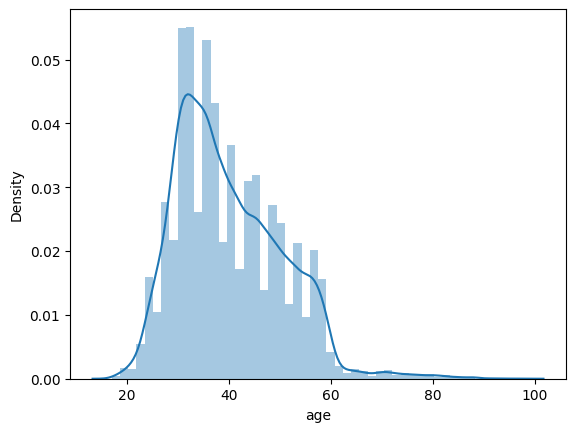

--------------------------------------------------------------------------------


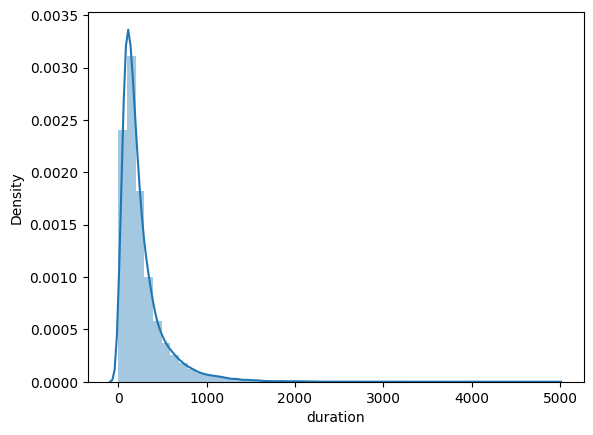

--------------------------------------------------------------------------------


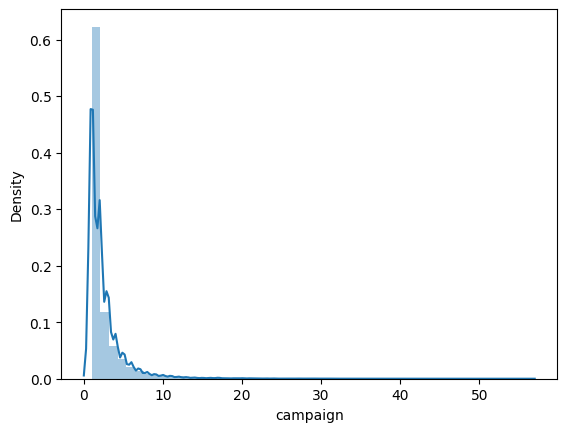

--------------------------------------------------------------------------------


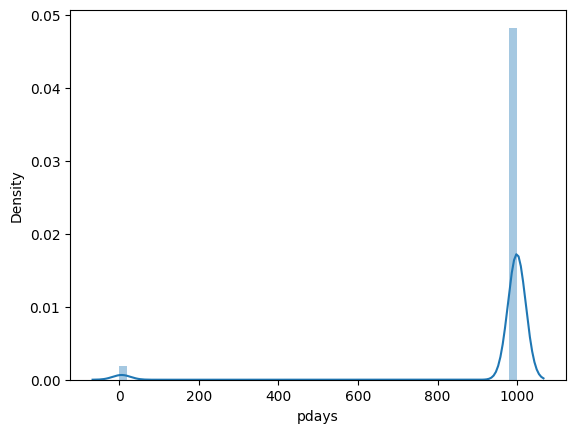

--------------------------------------------------------------------------------


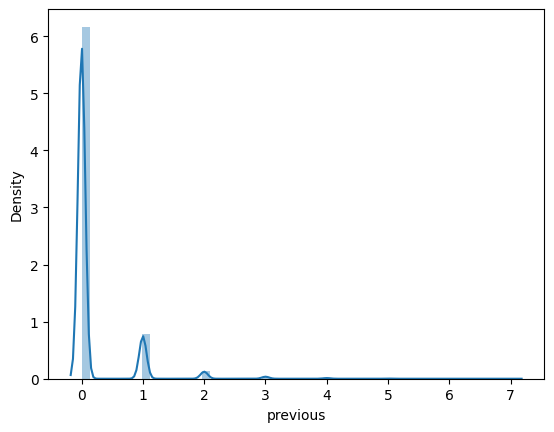

--------------------------------------------------------------------------------


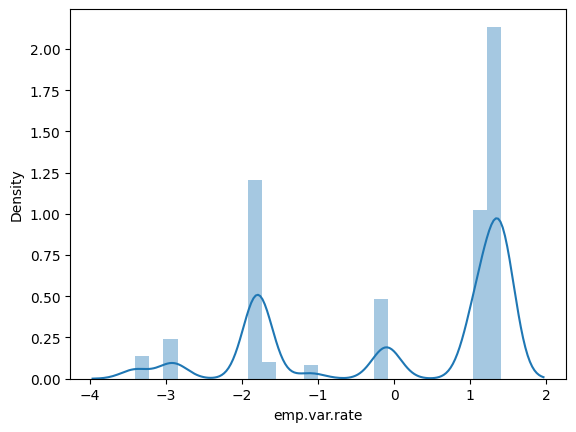

--------------------------------------------------------------------------------


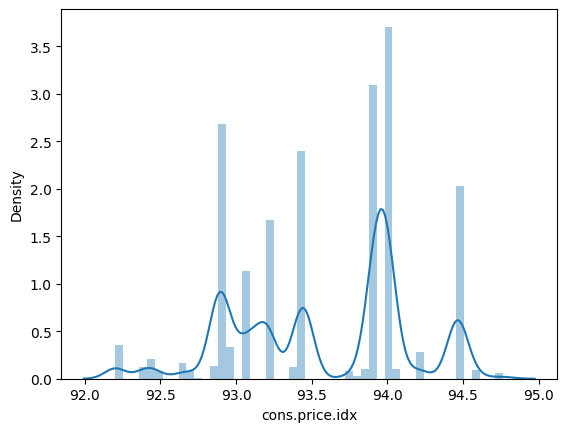

--------------------------------------------------------------------------------


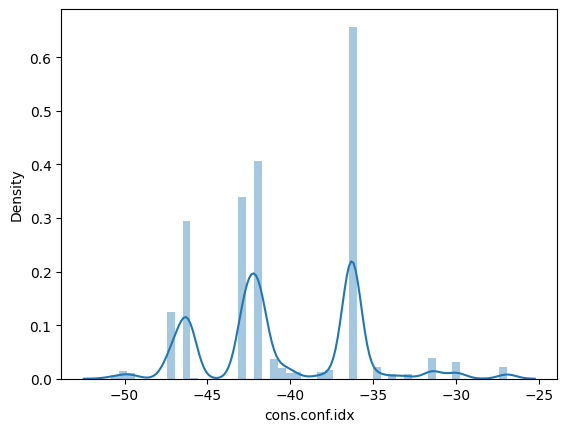

--------------------------------------------------------------------------------


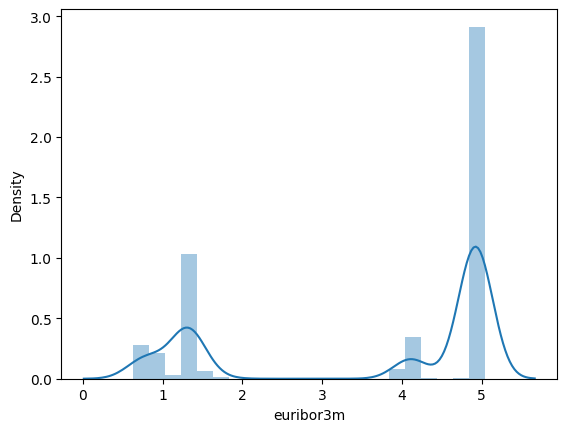

--------------------------------------------------------------------------------


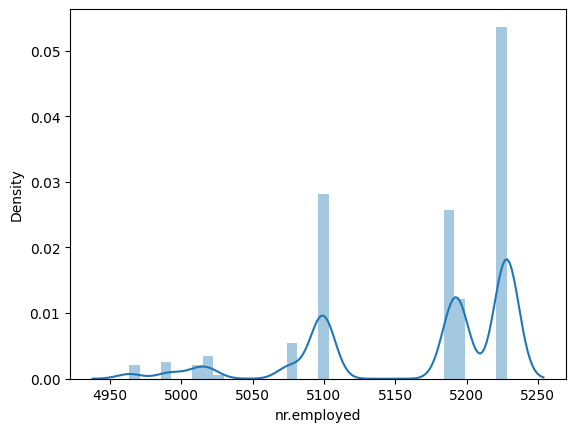

--------------------------------------------------------------------------------


In [11]:
import warnings
warnings.filterwarnings('ignore')

#Distribution of the data
for i in df.columns:
    if df[i].dtypes != 'object':
        sns.distplot(df[i])
        plt.show()
        print('-'*80)

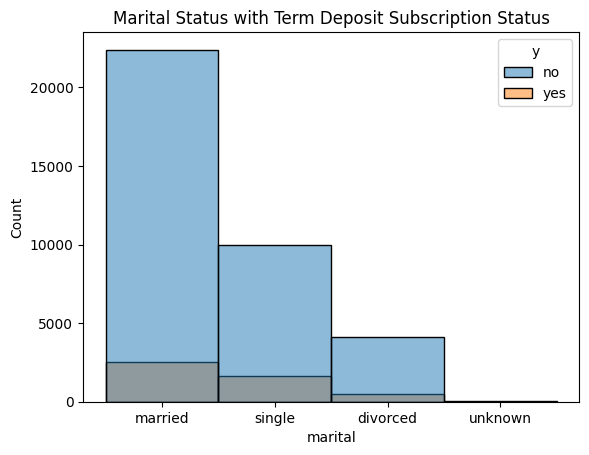

In [12]:
# fig=px.histogram(df,x=df['marital'],color=df['y'],barmode='group',title="Marital Status with Term Deposit Subscription Status")
# fig.show() ----> Plotly
sns.histplot(df,x=df['marital'],hue=df['y'])
plt.title('Marital Status with Term Deposit Subscription Status')
plt.show()

- The majority of people contacted in this campaign were married, followed by singles and divorced individuals.
- Across all marital statuses, the number of clients who did not subscribe (shown in blue) are significantly higher than those who did (shown in red).
- Married individuals have the highest count overall, but their subscription rate (red bar) is still low compared to non-subscribers. This indicates that while more married people were targeted, relatively few subscribed.
- Divorced individuals have the lowest counts among the marital categories, both in terms of total contacts and subscriptions.

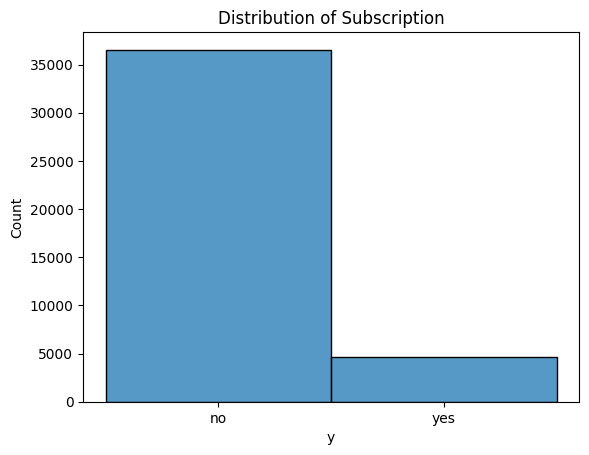

In [13]:
# px.histogram(df,x=df['y'],title="Distribution of Subscription") ----> Plotly
sns.histplot(df,x=df['y'])
plt.title('Distribution of Subscription')
plt.show()

- We can observe that **88.73%** of people have not subsribed to Term_Deposit and only **11.27%** of people have subscribed for the Term-Deposit which suggests that the data is **Imbalanced**.

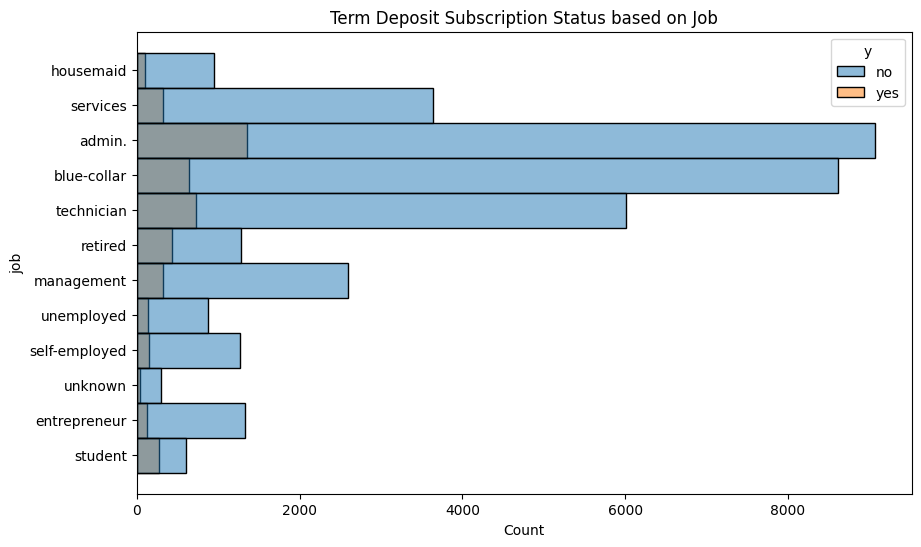

In [14]:
#px.histogram(df,y=df['job'],color=df['y'],title='Job with Term Deposit Subscription Status')---> Plotly
plt.figure(figsize=(10,6))
sns.histplot(df,y='job',hue='y')
plt.title('Term Deposit Subscription Status based on Job')
plt.show()

- Most customers have a job. The majority of customers are employed in the "admin." and "blue-collar" categories.
- People with `unknown` job are very less in terms of subscription and contact
- The highest percentage of customers with term deposit subscriptions are in the "admin." and "technician" categories.

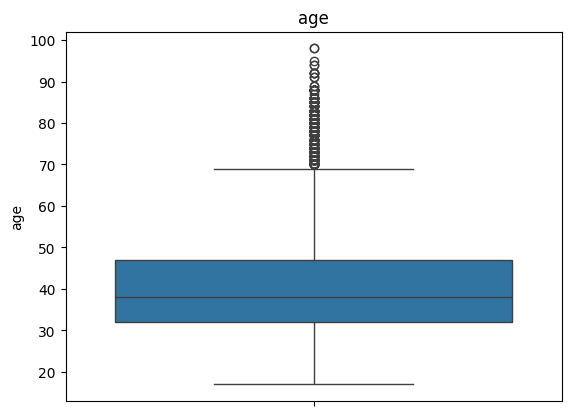

------------------------------------------------------------------------------------------------------------------------


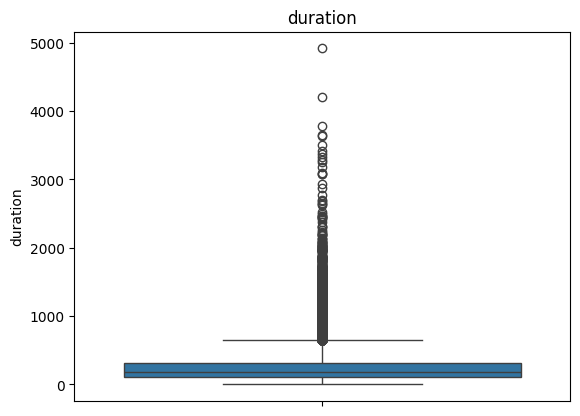

------------------------------------------------------------------------------------------------------------------------


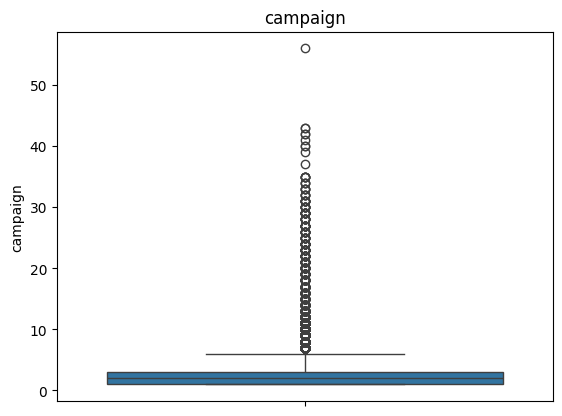

------------------------------------------------------------------------------------------------------------------------


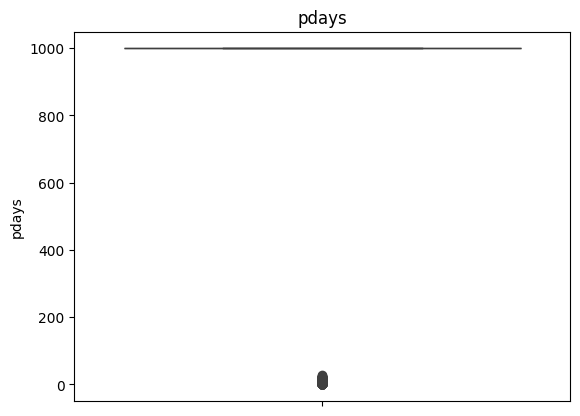

------------------------------------------------------------------------------------------------------------------------


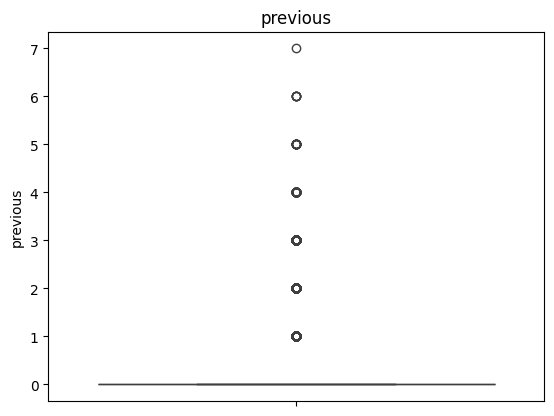

------------------------------------------------------------------------------------------------------------------------


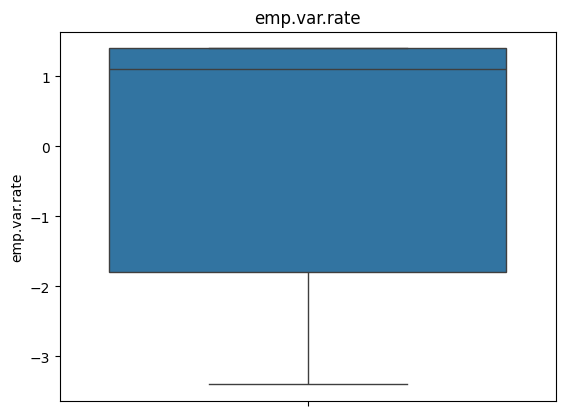

------------------------------------------------------------------------------------------------------------------------


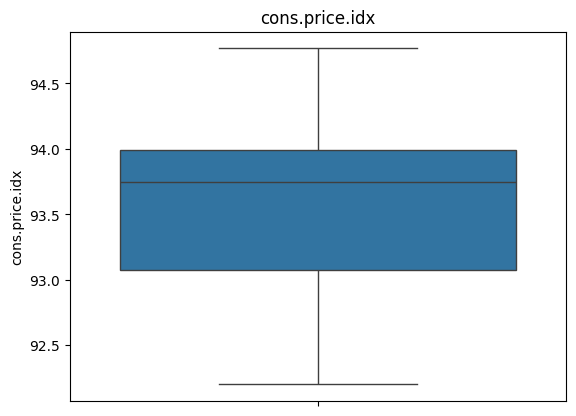

------------------------------------------------------------------------------------------------------------------------


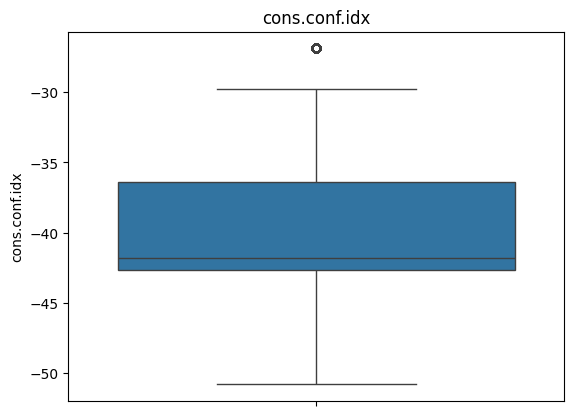

------------------------------------------------------------------------------------------------------------------------


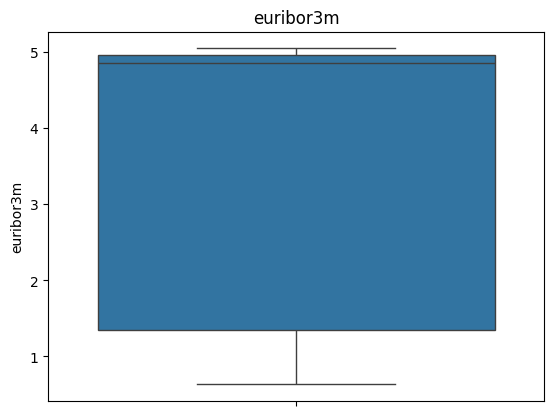

------------------------------------------------------------------------------------------------------------------------


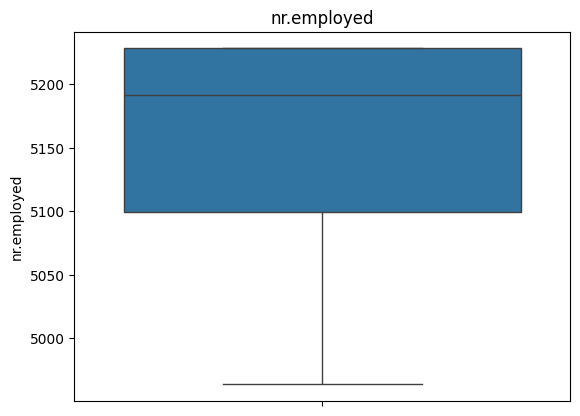

------------------------------------------------------------------------------------------------------------------------


In [15]:
#Outlier Analysis
for i in df.columns:
    if df[i].dtypes != 'object':
        fig=sns.boxplot(df[i])
        plt.title(i)
        plt.show()
        print('-'*120)

In [16]:
#Dropping Outliers
outliers=['age','duration','campaign','previous','cons.conf.idx']

for col in outliers:
    Q3=df[col].quantile(0.75)
    Q1=df[col].quantile(0.25)
    IQR=Q3-Q1
    LL=Q1 - 1.5* IQR #lower Limit
    UL=Q3 + 1.5* IQR #Uppper Limit
    df=df[(df[col] >= LL) & (df[col] <= UL)]

In [17]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in df.columns:
    if df[col].dtypes == 'object':
        df[col]=le.fit_transform(df[col])

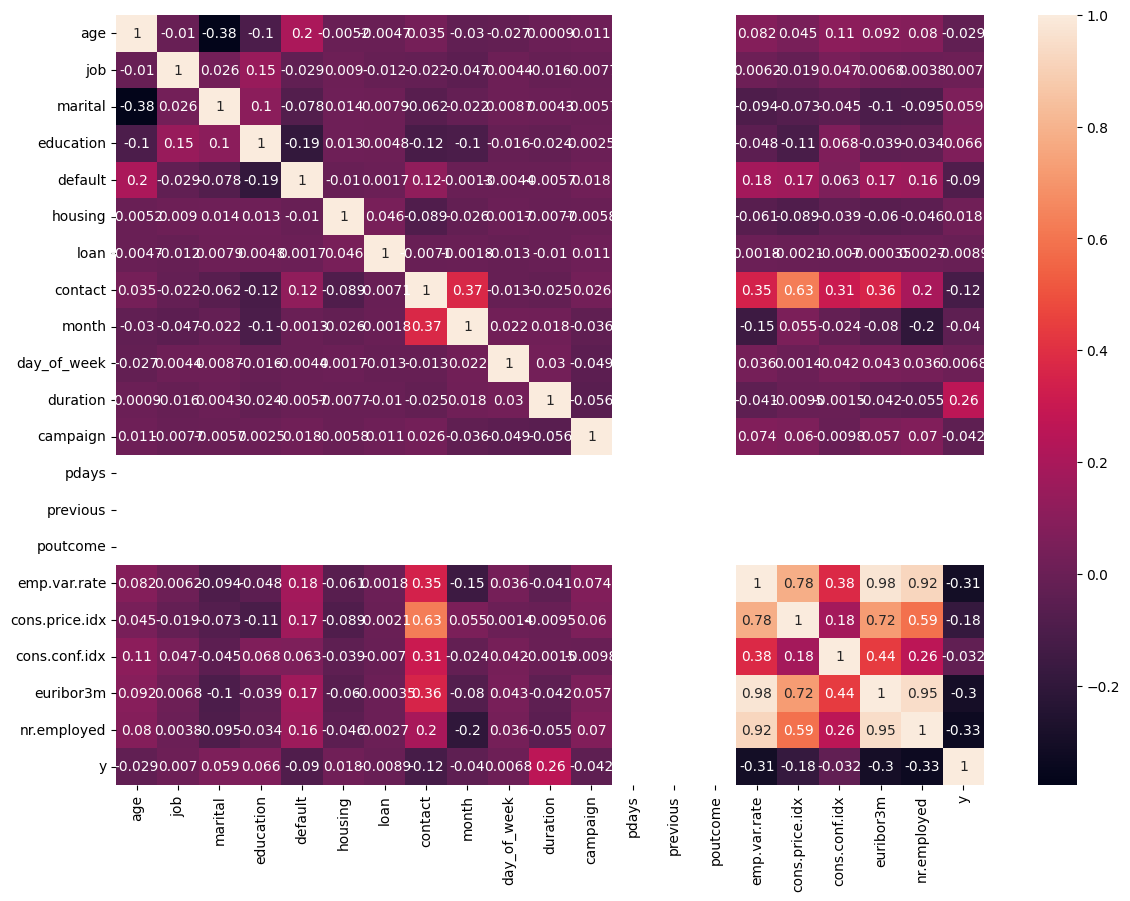

In [18]:
#Correlation
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Feature Selection

In [19]:
x=df.iloc[:,0:20]
y=df.iloc[:,-1]

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

model_features=rf.fit(x,y)

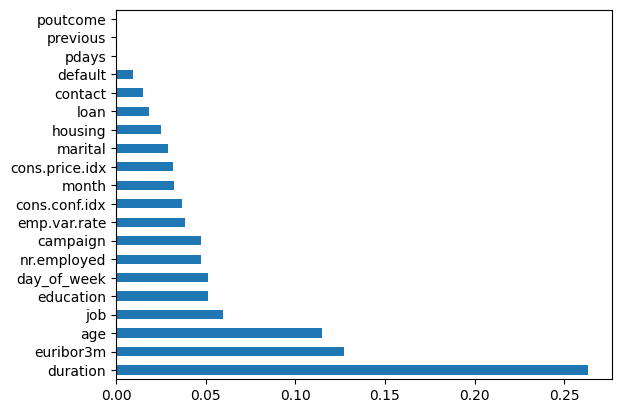

In [21]:
imp_features=pd.Series(model_features.feature_importances_,index=x.columns)
imp_features.nlargest(21).plot(kind='barh')
plt.show()

In [22]:
best_features=['age', 'job', 'marital', 'education','housing', 'loan','month', 'day_of_week', 'duration', 'campaign',
       'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']

## Model Building

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [24]:
X=df[best_features]
y=df['y']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=6)

In [26]:
print('Shape of x_train:',x_train.shape)
print('Shape of x_test:',x_test.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of y_test:',y_test.shape)

Shape of x_train: (21244, 15)
Shape of x_test: (9105, 15)
Shape of y_train: (21244,)
Shape of y_test: (9105,)


In [27]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train_std=sc.fit_transform(x_train)
x_test_std=sc.transform(x_test)

In [28]:
y_train_arr=y_train.values
y_train_lr=y_train_arr.reshape((-1,1))

In [29]:
#Fitting the Logistic Regression Model
lr=LogisticRegression()
model_lr=lr.fit(x_train_std,y_train_lr)

In [30]:
#Predticting the values for x_test
y_pred_lr=model_lr.predict(x_test_std)

In [31]:
#Evaluation of Logistic Regression Model
acc=accuracy_score(y_test,y_pred_lr)*100
print('Accuracy of the Logistic Regression Model         :',acc)

ps=precision_score(y_test,y_pred_lr)
print('Precision Score of the Logistic Regression Model  :',ps)

rs=recall_score(y_test,y_pred_lr)
print('Recall Score of the Logistic Regression Model     :',rs)

cm=confusion_matrix(y_test,y_pred_lr)
print('Confusion Matrix of the Logistic Regression Model :\n',cm)

Accuracy of the Logistic Regression Model         : 94.87095002745744
Precision Score of the Logistic Regression Model  : 0.595
Recall Score of the Logistic Regression Model     : 0.23564356435643563
Confusion Matrix of the Logistic Regression Model :
 [[8519   81]
 [ 386  119]]


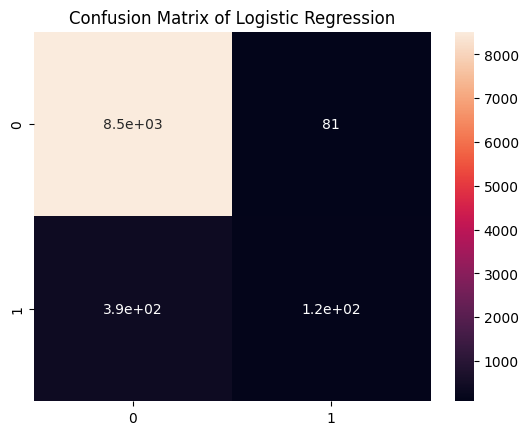

In [32]:
#Visualisation of Confusion Matrix
sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [34]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=6)

In [35]:
dt=DecisionTreeClassifier()

model_dt=dt.fit(x_train,y_train)

In [36]:
y_pred_dt=model_dt.predict(x_test)

In [37]:
#Evaluation of Decision Tree Model
acc_dt=accuracy_score(y_test,y_pred_dt)*100
print('Precision Score of the Decision Tree Model  :',acc_dt)

ps_dt=precision_score(y_test,y_pred_dt)
print('Precision Score of the Decision Tree Model  :',ps_dt)

rs_dt=recall_score(y_test,y_pred_dt)
print('Recall Score of the Decision Tree Model     :',rs_dt)

cm_dt=confusion_matrix(y_test,y_pred_dt)
print('Confusion Matrix of the Decision Tree Model :\n',cm_dt)

Precision Score of the Decision Tree Model  : 93.34431630971993
Precision Score of the Decision Tree Model  : 0.4026974951830443
Recall Score of the Decision Tree Model     : 0.41386138613861384
Confusion Matrix of the Decision Tree Model :
 [[8290  310]
 [ 296  209]]


### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

model_rf=rf.fit(x_train,y_train)

In [39]:
y_pred_rf=model_rf.predict(x_test)

In [40]:
#Evaluation OfRandom Forest Model
acc_rf=accuracy_score(y_test,y_pred_rf)*100
print('Precision Score of the Random Forest Model  :',acc_rf)

ps_rf=precision_score(y_test,y_pred_rf)
print('Precision Score of the Random Forest Model  :',ps_rf)

rs_rf=recall_score(y_test,y_pred_rf)
print('Recall Score of the Random Forest Model     :',rs_rf)

cm_rf=confusion_matrix(y_test,y_pred_rf)
print('Confusion Matrix of the Random Forest Model :\n',cm_rf)

Precision Score of the Random Forest Model  : 95.07962657880286
Precision Score of the Random Forest Model  : 0.6144578313253012
Recall Score of the Random Forest Model     : 0.30297029702970296
Confusion Matrix of the Random Forest Model :
 [[8504   96]
 [ 352  153]]


In [41]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8600
           1       0.61      0.30      0.41       505

    accuracy                           0.95      9105
   macro avg       0.79      0.65      0.69      9105
weighted avg       0.94      0.95      0.94      9105



### XGBoost

In [42]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

model_xgb=xgb.fit(x_train,y_train)

In [43]:
y_pred_xgb=model_xgb.predict(x_test)

In [44]:
#Evaluation of XGBoost Model
acc_xgb=accuracy_score(y_test,y_pred_xgb)*100
print('Precision Score of the XGBoost Model  :',acc_xgb)

ps_xgb=precision_score(y_test,y_pred_xgb)
print('Precision Score of the XGBoost Model  :',ps_xgb)

rs_xgb=recall_score(y_test,y_pred_xgb)
print('Recall Score of the XGBoost Model     :',rs_xgb)

cm_xgb=confusion_matrix(y_test,y_pred_xgb)
print('Confusion Matrix of the XGBoost Model :\n',cm_xgb)

Precision Score of the XGBoost Model  : 95.14552443712246
Precision Score of the XGBoost Model  : 0.5987460815047022
Recall Score of the XGBoost Model     : 0.3782178217821782
Confusion Matrix of the XGBoost Model :
 [[8472  128]
 [ 314  191]]


In [45]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8600
           1       0.60      0.38      0.46       505

    accuracy                           0.95      9105
   macro avg       0.78      0.68      0.72      9105
weighted avg       0.94      0.95      0.95      9105



## Random Forest with Over-Sampling(SMOTE)

In [46]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

In [47]:
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.30,random_state=6)

In [48]:
x_train.shape

(40173, 20)

In [49]:
rf_os=RandomForestClassifier()

model_rf_os=rf_os.fit(x_train,y_train)

In [50]:
y_pred_rf_os=model_rf_os.predict(x_test)

In [51]:
#Evaluation of Random Forest Model with Over-Sampling(SMOTE)
acc_rf_os=accuracy_score(y_test,y_pred_rf_os)*100
print('Precision Score of the Random Forest with Over-Sampling Model  :',acc_rf_os)

ps_rf_os=precision_score(y_test,y_pred_rf_os)
print('Precision Score of the Random Forest with Over-Sampling Model  :',ps_rf_os)

rs_rf_os=recall_score(y_test,y_pred_rf_os)
print('Recall Score of the Random Forest with Over-Sampling Model     :',rs_rf_os)

cm_rf_os=confusion_matrix(y_test,y_pred_rf_os)
print('Confusion Matrix of the Random Forest with Over-Sampling Model :\n',cm_rf_os)

Precision Score of the Random Forest with Over-Sampling Model  : 97.66509844920718
Precision Score of the Random Forest with Over-Sampling Model  : 0.9704936854190586
Recall Score of the Random Forest with Over-Sampling Model     : 0.9831356129332403
Confusion Matrix of the Random Forest with Over-Sampling Model :
 [[8362  257]
 [ 145 8453]]


In [52]:
print(classification_report(y_test,y_pred_rf_os))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      8619
           1       0.97      0.98      0.98      8598

    accuracy                           0.98     17217
   macro avg       0.98      0.98      0.98     17217
weighted avg       0.98      0.98      0.98     17217



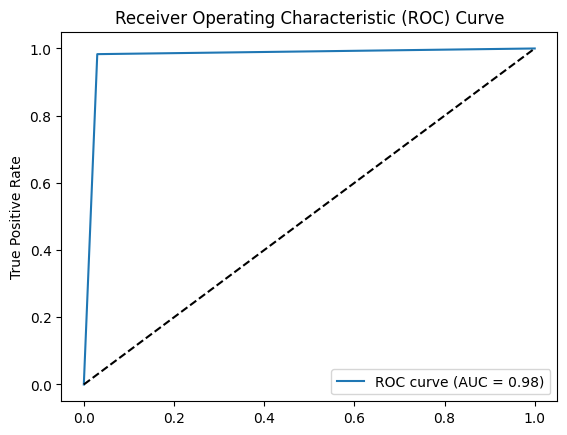

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_os)
auc = roc_auc_score(y_test, y_pred_rf_os)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Conclusion
The **Random Forest** with **Over-Sampling(SMOTE)** model has demonstrated **exceptional performance** in predicting customer subscription to a term deposit. Its **high precision**, **recall**, and overall **accuracy** make it a reliable tool for the bank to identify potential customers and optimize marketing strategies.

- Recommendations for the Bank:

Targeted Marketing: Utilize the model to identify customers who are highly likely to subscribe to a term deposit.
Personalized Offers: Tailor marketing campaigns and offers to individual customer preferences and needs.
Customer Relationship Management: Prioritize building strong relationships with customers identified as high-potential subscribers.
Continuous Monitoring: Regularly monitor the model's performance and retrain it as needed to ensure its accuracy and relevance.
By leveraging the insights from this model, the bank can make informed decisions, improve customer satisfaction, and ultimately increase its revenue.
- `PROJECT BY` -**SHAIK MOHAMMAD SAMEER HUSSAIN**